In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('Data.csv')
data.head()

,glcm,green,red,nir,sd_band,Class
0,101.034682,190.090909,80.818182,319.363636,23.773031,0
1,101.575000,208.800000,95.200000,513.200000,31.083114,0
2,104.294068,372.126667,244.000000,292.673333,31.274115,0
3,104.312500,202.000000,93.000000,413.000000,18.580157,0
4,105.479167,339.666667,206.000000,609.333333,41.348116,0


In [3]:
data.shape

(574, 6)

In [14]:
from sklearn import preprocessing

data_arr = data.values #returns a numpy array

min_max_scaler = preprocessing.MinMaxScaler()
data_scaled = min_max_scaler.fit_transform(data_arr)

df = pd.DataFrame(data_scaled)
df.head()

,0,1,2,3,4,5
0,0.229323,0.042086,0.019585,0.120133,0.317897,0.0
1,0.235546,0.052890,0.028900,0.253587,0.446995,0.0
2,0.266865,0.147205,0.125272,0.101757,0.450368,0.0
3,0.267077,0.048963,0.027475,0.184600,0.226189,0.0
4,0.280515,0.128461,0.100661,0.319774,0.628278,0.0


In [15]:
df.rename(columns={0: 'glcm', 1: 'green',2: 'red',3: 'nir', 4:'sd_band', 5:'class'}, inplace=True)
df.head()

,glcm,green,red,nir,sd_band,class
0,0.229323,0.042086,0.019585,0.120133,0.317897,0.0
1,0.235546,0.052890,0.028900,0.253587,0.446995,0.0
2,0.266865,0.147205,0.125272,0.101757,0.450368,0.0
3,0.267077,0.048963,0.027475,0.184600,0.226189,0.0
4,0.280515,0.128461,0.100661,0.319774,0.628278,0.0


In [16]:
dataset = df.values
dataset

array([[0.22932285, 0.04208588, 0.01958494, 0.12013282, 0.31789654,
        0.        ],
       [0.23554631, 0.05288973, 0.02889956, 0.25358689, 0.4469948 ,
        0.        ],
       [0.26686497, 0.1472052 , 0.12527235, 0.10175686, 0.45036792,
        0.        ],
       ...,
       [0.426144  , 0.05814127, 0.05418142, 0.20533196, 0.2225839 ,
        1.        ],
       [0.66217095, 0.0556634 , 0.04891966, 0.19010827, 0.22132815,
        1.        ],
       [0.6124953 , 0.05392917, 0.04863489, 0.20056673, 0.26952617,
        1.        ]])

In [17]:
X = dataset[:, :5]
y = dataset[:, 5]

In [18]:
from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, random_state=42)
# X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size=0.7, random_state=42)
# X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size=0.33)

In [19]:
print ('Train X Shape: ', X_train.shape)
print ('Train y Shape: ', y_train.shape)
# print ('Valid X Shape: ', X_valid.shape)
# print ('Valid y Shape: ', y_valid.shape)
print ('Test X Shape: ', X_test.shape)
print ('Test y Shape: ', y_test.shape)

Train X Shape:  (516, 5)
Train y Shape:  (516,)
Test X Shape:  (58, 5)
Test y Shape:  (58,)


In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [21]:
model = Sequential()
model.add(Dense(5, input_dim=5, activation='relu')) 
model.add(Dense(1, activation='sigmoid'))

In [22]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [23]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
stp = EarlyStopping(monitor='val_loss', mode='min',patience=500)
# sve = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', save_best_only=True)
sve = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True)

In [24]:
mdl = model.fit(X_train, y_train, validation_split = 0.22, epochs=10000, batch_size=10, callbacks=(stp,sve))
# history = model.fit(X_train, y_train, epochs=100, batch_size=10)

Epoch 1/10000
41/41 [==============================] - 1s 8ms/step - loss: 0.2489 - accuracy: 0.5348 - val_loss: 0.2469 - val_accuracy: 0.5351
Epoch 2/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.2480 - accuracy: 0.5348 - val_loss: 0.2463 - val_accuracy: 0.5351
Epoch 3/10000
41/41 [==============================] - 0s 4ms/step - loss: 0.2478 - accuracy: 0.5348 - val_loss: 0.2460 - val_accuracy: 0.5351
Epoch 4/10000
41/41 [==============================] - ETA: 0s - loss: 0.2449 - accuracy: 0.56 - 0s 4ms/step - loss: 0.2477 - accuracy: 0.5348 - val_loss: 0.2457 - val_accuracy: 0.5351
Epoch 5/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.2475 - accuracy: 0.5323 - val_loss: 0.2455 - val_accuracy: 0.5351
Epoch 6/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.2477 - accuracy: 0.5348 - val_loss: 0.2454 - val_accuracy: 0.5351
Epoch 7/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.2474 - accuracy: 0.5348

41/41 [==============================] - 0s 3ms/step - loss: 0.2427 - accuracy: 0.5174 - val_loss: 0.2382 - val_accuracy: 0.5614
Epoch 58/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.2421 - accuracy: 0.5149 - val_loss: 0.2379 - val_accuracy: 0.5351
Epoch 59/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.2419 - accuracy: 0.5100 - val_loss: 0.2376 - val_accuracy: 0.5351
Epoch 60/10000
41/41 [==============================] - ETA: 0s - loss: 0.2420 - accuracy: 0.52 - 0s 3ms/step - loss: 0.2419 - accuracy: 0.5149 - val_loss: 0.2374 - val_accuracy: 0.5614
Epoch 61/10000
41/41 [==============================] - ETA: 0s - loss: 0.2422 - accuracy: 0.50 - 0s 3ms/step - loss: 0.2415 - accuracy: 0.5174 - val_loss: 0.2373 - val_accuracy: 0.5614
Epoch 62/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.2413 - accuracy: 0.5224 - val_loss: 0.2371 - val_accuracy: 0.5877
Epoch 63/10000
41/41 [==============================] - 0s 3ms/step

41/41 [==============================] - 0s 3ms/step - loss: 0.2263 - accuracy: 0.6567 - val_loss: 0.2206 - val_accuracy: 0.6930
Epoch 112/10000
41/41 [==============================] - 0s 4ms/step - loss: 0.2261 - accuracy: 0.6517 - val_loss: 0.2202 - val_accuracy: 0.7105
Epoch 113/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.2262 - accuracy: 0.7040 - val_loss: 0.2197 - val_accuracy: 0.7281
Epoch 114/10000
41/41 [==============================] - 0s 8ms/step - loss: 0.2258 - accuracy: 0.6269 - val_loss: 0.2192 - val_accuracy: 0.6754
Epoch 115/10000
41/41 [==============================] - 0s 4ms/step - loss: 0.2255 - accuracy: 0.6965 - val_loss: 0.2189 - val_accuracy: 0.7281
Epoch 116/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.2254 - accuracy: 0.6244 - val_loss: 0.2186 - val_accuracy: 0.7281
Epoch 117/10000
41/41 [==============================] - ETA: 0s - loss: 0.2248 - accuracy: 0.67 - 0s 7ms/step - loss: 0.2244 - accuracy: 0.6816 -

Epoch 166/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.2081 - accuracy: 0.7189 - val_loss: 0.1989 - val_accuracy: 0.7982
Epoch 167/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.2077 - accuracy: 0.7264 - val_loss: 0.1981 - val_accuracy: 0.7456
Epoch 168/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.2073 - accuracy: 0.7338 - val_loss: 0.1977 - val_accuracy: 0.7807
Epoch 169/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.2071 - accuracy: 0.7438 - val_loss: 0.1972 - val_accuracy: 0.7807
Epoch 170/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.2071 - accuracy: 0.7164 - val_loss: 0.1967 - val_accuracy: 0.7456
Epoch 171/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.2065 - accuracy: 0.7438 - val_loss: 0.1967 - val_accuracy: 0.7982
Epoch 172/10000
41/41 [==============================] - 0s 4ms/step - loss: 0.2065 - accuracy: 0.7612 - val_loss: 0.1958 - val_ac

41/41 [==============================] - ETA: 0s - loss: 0.1909 - accuracy: 0.75 - 0s 3ms/step - loss: 0.1909 - accuracy: 0.7512 - val_loss: 0.1773 - val_accuracy: 0.8070
Epoch 222/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.1904 - accuracy: 0.7662 - val_loss: 0.1771 - val_accuracy: 0.8333
Epoch 223/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.1907 - accuracy: 0.7463 - val_loss: 0.1768 - val_accuracy: 0.8333
Epoch 224/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.1901 - accuracy: 0.7711 - val_loss: 0.1763 - val_accuracy: 0.8333
Epoch 225/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.1895 - accuracy: 0.7637 - val_loss: 0.1761 - val_accuracy: 0.8333
Epoch 226/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.1901 - accuracy: 0.7761 - val_loss: 0.1759 - val_accuracy: 0.8333
Epoch 227/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.1893 - accuracy: 0.7612 -

Epoch 275/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.1765 - accuracy: 0.7761 - val_loss: 0.1606 - val_accuracy: 0.8509
Epoch 276/10000
41/41 [==============================] - ETA: 0s - loss: 0.1777 - accuracy: 0.77 - 0s 3ms/step - loss: 0.1760 - accuracy: 0.7786 - val_loss: 0.1603 - val_accuracy: 0.8333
Epoch 277/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.1757 - accuracy: 0.7786 - val_loss: 0.1599 - val_accuracy: 0.8421
Epoch 278/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.1756 - accuracy: 0.7886 - val_loss: 0.1598 - val_accuracy: 0.8421
Epoch 279/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.1759 - accuracy: 0.7786 - val_loss: 0.1590 - val_accuracy: 0.8421
Epoch 280/10000
41/41 [==============================] - ETA: 0s - loss: 0.1731 - accuracy: 0.80 - 0s 3ms/step - loss: 0.1751 - accuracy: 0.7985 - val_loss: 0.1590 - val_accuracy: 0.8421
Epoch 281/10000
41/41 [=======================

Epoch 329/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.1640 - accuracy: 0.7985 - val_loss: 0.1462 - val_accuracy: 0.8684
Epoch 330/10000
41/41 [==============================] - ETA: 0s - loss: 0.1619 - accuracy: 0.79 - 0s 3ms/step - loss: 0.1641 - accuracy: 0.7910 - val_loss: 0.1457 - val_accuracy: 0.8596
Epoch 331/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.1637 - accuracy: 0.8035 - val_loss: 0.1451 - val_accuracy: 0.8509
Epoch 332/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.1633 - accuracy: 0.8085 - val_loss: 0.1445 - val_accuracy: 0.8421
Epoch 333/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.1632 - accuracy: 0.7935 - val_loss: 0.1444 - val_accuracy: 0.8421
Epoch 334/10000
41/41 [==============================] - 0s 4ms/step - loss: 0.1631 - accuracy: 0.8109 - val_loss: 0.1443 - val_accuracy: 0.8421
Epoch 335/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.1632 - ac

41/41 [==============================] - 0s 4ms/step - loss: 0.1539 - accuracy: 0.8109 - val_loss: 0.1355 - val_accuracy: 0.8684
Epoch 383/10000
41/41 [==============================] - 0s 12ms/step - loss: 0.1537 - accuracy: 0.8109 - val_loss: 0.1355 - val_accuracy: 0.8684
Epoch 384/10000
41/41 [==============================] - 0s 8ms/step - loss: 0.1535 - accuracy: 0.8159 - val_loss: 0.1350 - val_accuracy: 0.8596
Epoch 385/10000
41/41 [==============================] - 0s 10ms/step - loss: 0.1536 - accuracy: 0.8109 - val_loss: 0.1349 - val_accuracy: 0.8684
Epoch 386/10000
41/41 [==============================] - ETA: 0s - loss: 0.1542 - accuracy: 0.80 - 0s 5ms/step - loss: 0.1532 - accuracy: 0.8060 - val_loss: 0.1352 - val_accuracy: 0.8684
Epoch 387/10000
41/41 [==============================] - 0s 5ms/step - loss: 0.1548 - accuracy: 0.8184 - val_loss: 0.1345 - val_accuracy: 0.8509
Epoch 388/10000
41/41 [==============================] - 0s 5ms/step - loss: 0.1529 - accuracy: 0.8134

Epoch 436/10000
41/41 [==============================] - ETA: 0s - loss: 0.1440 - accuracy: 0.83 - 0s 3ms/step - loss: 0.1455 - accuracy: 0.8284 - val_loss: 0.1278 - val_accuracy: 0.8596
Epoch 437/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.1455 - accuracy: 0.8308 - val_loss: 0.1278 - val_accuracy: 0.8596
Epoch 438/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.1461 - accuracy: 0.8134 - val_loss: 0.1281 - val_accuracy: 0.8421
Epoch 439/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.1452 - accuracy: 0.8134 - val_loss: 0.1280 - val_accuracy: 0.8684
Epoch 440/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.1446 - accuracy: 0.8259 - val_loss: 0.1277 - val_accuracy: 0.8684
Epoch 441/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.1448 - accuracy: 0.8234 - val_loss: 0.1275 - val_accuracy: 0.8596
Epoch 442/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.1446 - ac

41/41 [==============================] - 0s 3ms/step - loss: 0.1376 - accuracy: 0.8333 - val_loss: 0.1224 - val_accuracy: 0.8596
Epoch 490/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.1378 - accuracy: 0.8159 - val_loss: 0.1224 - val_accuracy: 0.8684
Epoch 491/10000
41/41 [==============================] - ETA: 0s - loss: 0.1391 - accuracy: 0.83 - 0s 3ms/step - loss: 0.1372 - accuracy: 0.8333 - val_loss: 0.1224 - val_accuracy: 0.8684
Epoch 492/10000
41/41 [==============================] - 0s 5ms/step - loss: 0.1370 - accuracy: 0.8259 - val_loss: 0.1224 - val_accuracy: 0.8860
Epoch 493/10000
41/41 [==============================] - 0s 4ms/step - loss: 0.1372 - accuracy: 0.8358 - val_loss: 0.1220 - val_accuracy: 0.8772
Epoch 494/10000
41/41 [==============================] - 0s 4ms/step - loss: 0.1367 - accuracy: 0.8308 - val_loss: 0.1219 - val_accuracy: 0.8684
Epoch 495/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.1367 - accuracy: 0.8259 -

Epoch 543/10000
41/41 [==============================] - 0s 4ms/step - loss: 0.1304 - accuracy: 0.8483 - val_loss: 0.1183 - val_accuracy: 0.8860
Epoch 544/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.1301 - accuracy: 0.8408 - val_loss: 0.1179 - val_accuracy: 0.8772
Epoch 545/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.1302 - accuracy: 0.8333 - val_loss: 0.1180 - val_accuracy: 0.8772
Epoch 546/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.1302 - accuracy: 0.8433 - val_loss: 0.1179 - val_accuracy: 0.8772
Epoch 547/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.1297 - accuracy: 0.8433 - val_loss: 0.1176 - val_accuracy: 0.8772
Epoch 548/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.1309 - accuracy: 0.8184 - val_loss: 0.1192 - val_accuracy: 0.8947
Epoch 549/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.1295 - accuracy: 0.8433 - val_loss: 0.1175 - val_ac

41/41 [==============================] - 0s 3ms/step - loss: 0.1226 - accuracy: 0.8483 - val_loss: 0.1135 - val_accuracy: 0.8860
Epoch 598/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.1226 - accuracy: 0.8483 - val_loss: 0.1132 - val_accuracy: 0.8772
Epoch 599/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.1226 - accuracy: 0.8483 - val_loss: 0.1134 - val_accuracy: 0.8860
Epoch 600/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.1224 - accuracy: 0.8532 - val_loss: 0.1138 - val_accuracy: 0.8947
Epoch 601/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.1224 - accuracy: 0.8532 - val_loss: 0.1133 - val_accuracy: 0.8860
Epoch 602/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.1221 - accuracy: 0.8557 - val_loss: 0.1130 - val_accuracy: 0.8860
Epoch 603/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.1219 - accuracy: 0.8557 - val_loss: 0.1126 - val_accuracy: 0.8772
E

41/41 [==============================] - ETA: 0s - loss: 0.1131 - accuracy: 0.85 - 0s 3ms/step - loss: 0.1163 - accuracy: 0.8507 - val_loss: 0.1096 - val_accuracy: 0.8947
Epoch 652/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.1171 - accuracy: 0.8607 - val_loss: 0.1088 - val_accuracy: 0.8684
Epoch 653/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.1164 - accuracy: 0.8507 - val_loss: 0.1089 - val_accuracy: 0.8947
Epoch 654/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.1159 - accuracy: 0.8557 - val_loss: 0.1085 - val_accuracy: 0.8947
Epoch 655/10000
41/41 [==============================] - ETA: 0s - loss: 0.1165 - accuracy: 0.85 - 0s 3ms/step - loss: 0.1162 - accuracy: 0.8532 - val_loss: 0.1084 - val_accuracy: 0.8772
Epoch 656/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.1156 - accuracy: 0.8582 - val_loss: 0.1088 - val_accuracy: 0.8947
Epoch 657/10000
41/41 [==============================] - 0s 3m

41/41 [==============================] - 0s 3ms/step - loss: 0.1103 - accuracy: 0.8657 - val_loss: 0.1051 - val_accuracy: 0.8947
Epoch 706/10000
41/41 [==============================] - ETA: 0s - loss: 0.1045 - accuracy: 0.87 - 0s 3ms/step - loss: 0.1108 - accuracy: 0.8706 - val_loss: 0.1047 - val_accuracy: 0.9035
Epoch 707/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.1110 - accuracy: 0.8706 - val_loss: 0.1052 - val_accuracy: 0.8947
Epoch 708/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.1116 - accuracy: 0.8706 - val_loss: 0.1042 - val_accuracy: 0.8772
Epoch 709/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.1102 - accuracy: 0.8682 - val_loss: 0.1045 - val_accuracy: 0.9035
Epoch 710/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.1100 - accuracy: 0.8682 - val_loss: 0.1041 - val_accuracy: 0.8947
Epoch 711/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.1099 - accuracy: 0.8706 -

41/41 [==============================] - 0s 3ms/step - loss: 0.1044 - accuracy: 0.8781 - val_loss: 0.1009 - val_accuracy: 0.9035
Epoch 760/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.1044 - accuracy: 0.8881 - val_loss: 0.1010 - val_accuracy: 0.9035
Epoch 761/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.1042 - accuracy: 0.8881 - val_loss: 0.1006 - val_accuracy: 0.8947
Epoch 762/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.1042 - accuracy: 0.8881 - val_loss: 0.1005 - val_accuracy: 0.9035
Epoch 763/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.1041 - accuracy: 0.8856 - val_loss: 0.1010 - val_accuracy: 0.9035
Epoch 764/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.1039 - accuracy: 0.8905 - val_loss: 0.1004 - val_accuracy: 0.9035
Epoch 765/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.1035 - accuracy: 0.8881 - val_loss: 0.1002 - val_accuracy: 0.9035
E

41/41 [==============================] - 0s 3ms/step - loss: 0.0986 - accuracy: 0.8930 - val_loss: 0.0974 - val_accuracy: 0.9123
Epoch 815/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.0989 - accuracy: 0.8955 - val_loss: 0.0981 - val_accuracy: 0.9035
Epoch 816/10000
41/41 [==============================] - ETA: 0s - loss: 0.0940 - accuracy: 0.89 - 0s 3ms/step - loss: 0.0987 - accuracy: 0.8881 - val_loss: 0.0966 - val_accuracy: 0.8772
Epoch 817/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.0985 - accuracy: 0.8905 - val_loss: 0.0965 - val_accuracy: 0.9035
Epoch 818/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.0981 - accuracy: 0.8930 - val_loss: 0.0967 - val_accuracy: 0.9035
Epoch 819/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.0985 - accuracy: 0.8905 - val_loss: 0.0966 - val_accuracy: 0.9035
Epoch 820/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.0986 - accuracy: 0.8881 -

41/41 [==============================] - ETA: 0s - loss: 0.0910 - accuracy: 0.89 - 0s 3ms/step - loss: 0.0940 - accuracy: 0.8905 - val_loss: 0.0939 - val_accuracy: 0.9035
Epoch 868/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.0939 - accuracy: 0.8856 - val_loss: 0.0930 - val_accuracy: 0.8772
Epoch 869/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.0943 - accuracy: 0.8905 - val_loss: 0.0931 - val_accuracy: 0.9211
Epoch 870/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0936 - accuracy: 0.8955 - val_loss: 0.0930 - val_accuracy: 0.9211
Epoch 871/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.0944 - accuracy: 0.8881 - val_loss: 0.0931 - val_accuracy: 0.8684
Epoch 872/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.0944 - accuracy: 0.8856 - val_loss: 0.0930 - val_accuracy: 0.9211
Epoch 873/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.0938 - accuracy: 0.8856 -

41/41 [==============================] - 0s 3ms/step - loss: 0.0894 - accuracy: 0.8980 - val_loss: 0.0896 - val_accuracy: 0.9211
Epoch 921/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.0896 - accuracy: 0.8980 - val_loss: 0.0896 - val_accuracy: 0.9211
Epoch 922/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.0894 - accuracy: 0.8980 - val_loss: 0.0895 - val_accuracy: 0.9123
Epoch 923/10000
41/41 [==============================] - ETA: 0s - loss: 0.0497 - accuracy: 0.90 - ETA: 0s - loss: 0.0927 - accuracy: 0.89 - 0s 3ms/step - loss: 0.0891 - accuracy: 0.8980 - val_loss: 0.0892 - val_accuracy: 0.9211
Epoch 924/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.0901 - accuracy: 0.8930 - val_loss: 0.0900 - val_accuracy: 0.9123
Epoch 925/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.0894 - accuracy: 0.9030 - val_loss: 0.0902 - val_accuracy: 0.9123
Epoch 926/10000
41/41 [==============================] - 0s 3m

41/41 [==============================] - 0s 3ms/step - loss: 0.0859 - accuracy: 0.9030 - val_loss: 0.0863 - val_accuracy: 0.8947
Epoch 974/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.0864 - accuracy: 0.8955 - val_loss: 0.0872 - val_accuracy: 0.9123
Epoch 975/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.0858 - accuracy: 0.9055 - val_loss: 0.0872 - val_accuracy: 0.9123
Epoch 976/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.0850 - accuracy: 0.9055 - val_loss: 0.0863 - val_accuracy: 0.9123
Epoch 977/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.0854 - accuracy: 0.9055 - val_loss: 0.0867 - val_accuracy: 0.9123
Epoch 978/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.0855 - accuracy: 0.8980 - val_loss: 0.0869 - val_accuracy: 0.9123
Epoch 979/10000
41/41 [==============================] - 0s 4ms/step - loss: 0.0853 - accuracy: 0.9080 - val_loss: 0.0860 - val_accuracy: 0.9123
E

41/41 [==============================] - 0s 3ms/step - loss: 0.0821 - accuracy: 0.9030 - val_loss: 0.0832 - val_accuracy: 0.9211
Epoch 1028/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.0825 - accuracy: 0.9104 - val_loss: 0.0838 - val_accuracy: 0.9123
Epoch 1029/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.0823 - accuracy: 0.9055 - val_loss: 0.0843 - val_accuracy: 0.9123
Epoch 1030/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0822 - accuracy: 0.9080 - val_loss: 0.0833 - val_accuracy: 0.9123
Epoch 1031/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.0817 - accuracy: 0.9104 - val_loss: 0.0833 - val_accuracy: 0.9123
Epoch 1032/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.0820 - accuracy: 0.9055 - val_loss: 0.0838 - val_accuracy: 0.9123
Epoch 1033/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.0823 - accuracy: 0.9030 - val_loss: 0.0838 - val_accuracy: 0.

41/41 [==============================] - 0s 3ms/step - loss: 0.0794 - accuracy: 0.9080 - val_loss: 0.0808 - val_accuracy: 0.9123
Epoch 1081/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0790 - accuracy: 0.9129 - val_loss: 0.0819 - val_accuracy: 0.9123
Epoch 1082/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.0791 - accuracy: 0.9104 - val_loss: 0.0814 - val_accuracy: 0.9211
Epoch 1083/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.0791 - accuracy: 0.9104 - val_loss: 0.0808 - val_accuracy: 0.9211
Epoch 1084/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.0791 - accuracy: 0.9129 - val_loss: 0.0810 - val_accuracy: 0.9211
Epoch 1085/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.0787 - accuracy: 0.9104 - val_loss: 0.0808 - val_accuracy: 0.9211
Epoch 1086/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.0792 - accuracy: 0.9104 - val_loss: 0.0817 - val_accuracy: 0.

41/41 [==============================] - 0s 3ms/step - loss: 0.0762 - accuracy: 0.9129 - val_loss: 0.0784 - val_accuracy: 0.9035
Epoch 1136/10000
41/41 [==============================] - ETA: 0s - loss: 0.0763 - accuracy: 0.92 - 0s 3ms/step - loss: 0.0767 - accuracy: 0.9204 - val_loss: 0.0793 - val_accuracy: 0.9211
Epoch 1137/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.0762 - accuracy: 0.9179 - val_loss: 0.0784 - val_accuracy: 0.9211
Epoch 1138/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.0767 - accuracy: 0.9154 - val_loss: 0.0787 - val_accuracy: 0.9211
Epoch 1139/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.0765 - accuracy: 0.9204 - val_loss: 0.0792 - val_accuracy: 0.9211
Epoch 1140/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.0769 - accuracy: 0.9129 - val_loss: 0.0783 - val_accuracy: 0.9211
Epoch 1141/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0765 - accuracy: 0.

41/41 [==============================] - 0s 3ms/step - loss: 0.0754 - accuracy: 0.9129 - val_loss: 0.0779 - val_accuracy: 0.9298
Epoch 1190/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.0752 - accuracy: 0.9179 - val_loss: 0.0760 - val_accuracy: 0.9123
Epoch 1191/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.0752 - accuracy: 0.9179 - val_loss: 0.0761 - val_accuracy: 0.9211
Epoch 1192/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.0742 - accuracy: 0.9179 - val_loss: 0.0777 - val_accuracy: 0.9298
Epoch 1193/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.0739 - accuracy: 0.9129 - val_loss: 0.0761 - val_accuracy: 0.9123
Epoch 1194/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.0750 - accuracy: 0.9129 - val_loss: 0.0793 - val_accuracy: 0.9211
Epoch 1195/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.0746 - accuracy: 0.9104 - val_loss: 0.0764 - val_accuracy: 0.

41/41 [==============================] - 0s 3ms/step - loss: 0.0722 - accuracy: 0.9179 - val_loss: 0.0761 - val_accuracy: 0.9211
Epoch 1244/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.0721 - accuracy: 0.9129 - val_loss: 0.0742 - val_accuracy: 0.9211
Epoch 1245/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.0737 - accuracy: 0.9229 - val_loss: 0.0743 - val_accuracy: 0.9123
Epoch 1246/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.0724 - accuracy: 0.9229 - val_loss: 0.0748 - val_accuracy: 0.9298
Epoch 1247/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.0722 - accuracy: 0.9254 - val_loss: 0.0766 - val_accuracy: 0.9211
Epoch 1248/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.0736 - accuracy: 0.9104 - val_loss: 0.0754 - val_accuracy: 0.9298
Epoch 1249/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.0722 - accuracy: 0.9229 - val_loss: 0.0745 - val_accuracy: 0.

41/41 [==============================] - 0s 3ms/step - loss: 0.0708 - accuracy: 0.9129 - val_loss: 0.0728 - val_accuracy: 0.9211
Epoch 1297/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0708 - accuracy: 0.9129 - val_loss: 0.0728 - val_accuracy: 0.9211
Epoch 1298/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.0718 - accuracy: 0.9154 - val_loss: 0.0727 - val_accuracy: 0.9211
Epoch 1299/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.0708 - accuracy: 0.9204 - val_loss: 0.0730 - val_accuracy: 0.9298
Epoch 1300/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.0709 - accuracy: 0.9229 - val_loss: 0.0729 - val_accuracy: 0.9211
Epoch 1301/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.0705 - accuracy: 0.9179 - val_loss: 0.0735 - val_accuracy: 0.9386
Epoch 1302/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.0705 - accuracy: 0.9254 - val_loss: 0.0733 - val_accuracy: 0.

41/41 [==============================] - 0s 3ms/step - loss: 0.0692 - accuracy: 0.9254 - val_loss: 0.0720 - val_accuracy: 0.9298
Epoch 1351/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.0693 - accuracy: 0.9204 - val_loss: 0.0722 - val_accuracy: 0.9386
Epoch 1352/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.0692 - accuracy: 0.9229 - val_loss: 0.0732 - val_accuracy: 0.9298
Epoch 1353/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.0696 - accuracy: 0.9154 - val_loss: 0.0721 - val_accuracy: 0.9386
Epoch 1354/10000
41/41 [==============================] - ETA: 0s - loss: 0.0677 - accuracy: 0.92 - 0s 3ms/step - loss: 0.0694 - accuracy: 0.9204 - val_loss: 0.0734 - val_accuracy: 0.9298
Epoch 1355/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.0696 - accuracy: 0.9104 - val_loss: 0.0720 - val_accuracy: 0.9298
Epoch 1356/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.0692 - accuracy: 0.

Epoch 1404/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.0689 - accuracy: 0.9104 - val_loss: 0.0711 - val_accuracy: 0.9386
Epoch 1405/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.0688 - accuracy: 0.9179 - val_loss: 0.0711 - val_accuracy: 0.9123
Epoch 1406/10000
41/41 [==============================] - ETA: 0s - loss: 0.0713 - accuracy: 0.90 - 0s 3ms/step - loss: 0.0678 - accuracy: 0.9204 - val_loss: 0.0718 - val_accuracy: 0.9386
Epoch 1407/10000
41/41 [==============================] - ETA: 0s - loss: 0.0375 - accuracy: 1.00 - ETA: 0s - loss: 0.0618 - accuracy: 0.94 - 0s 3ms/step - loss: 0.0678 - accuracy: 0.9254 - val_loss: 0.0712 - val_accuracy: 0.9386
Epoch 1408/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.0683 - accuracy: 0.9229 - val_loss: 0.0706 - val_accuracy: 0.9211
Epoch 1409/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0680 - accuracy: 0.9254 - val_loss: 0.0708 - val_accuracy: 0.938

41/41 [==============================] - 0s 2ms/step - loss: 0.0666 - accuracy: 0.9229 - val_loss: 0.0716 - val_accuracy: 0.9211
Epoch 1459/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.0682 - accuracy: 0.9229 - val_loss: 0.0712 - val_accuracy: 0.9298
Epoch 1460/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.0663 - accuracy: 0.9179 - val_loss: 0.0697 - val_accuracy: 0.9211
Epoch 1461/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.0676 - accuracy: 0.9229 - val_loss: 0.0697 - val_accuracy: 0.9211
Epoch 1462/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.0673 - accuracy: 0.9179 - val_loss: 0.0696 - val_accuracy: 0.9123
Epoch 1463/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.0674 - accuracy: 0.9229 - val_loss: 0.0713 - val_accuracy: 0.9211
Epoch 1464/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.0667 - accuracy: 0.9229 - val_loss: 0.0693 - val_accuracy: 0.

Epoch 1512/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.0654 - accuracy: 0.9179 - val_loss: 0.0686 - val_accuracy: 0.9123
Epoch 1513/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0662 - accuracy: 0.9154 - val_loss: 0.0700 - val_accuracy: 0.9211
Epoch 1514/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.0666 - accuracy: 0.9204 - val_loss: 0.0701 - val_accuracy: 0.9211
Epoch 1515/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.0657 - accuracy: 0.9254 - val_loss: 0.0686 - val_accuracy: 0.9123
Epoch 1516/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.0651 - accuracy: 0.9279 - val_loss: 0.0700 - val_accuracy: 0.9211
Epoch 1517/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.0655 - accuracy: 0.9279 - val_loss: 0.0684 - val_accuracy: 0.9298
Epoch 1518/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.0657 - accuracy: 0.9254 - val_loss: 0.0688 -

41/41 [==============================] - 0s 3ms/step - loss: 0.0647 - accuracy: 0.9254 - val_loss: 0.0678 - val_accuracy: 0.9386
Epoch 1566/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.0650 - accuracy: 0.9303 - val_loss: 0.0675 - val_accuracy: 0.9298
Epoch 1567/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.0650 - accuracy: 0.9279 - val_loss: 0.0679 - val_accuracy: 0.9386
Epoch 1568/10000
41/41 [==============================] - ETA: 0s - loss: 0.0490 - accuracy: 0.90 - ETA: 0s - loss: 0.0611 - accuracy: 0.93 - 0s 3ms/step - loss: 0.0643 - accuracy: 0.9279 - val_loss: 0.0678 - val_accuracy: 0.9211
Epoch 1569/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.0648 - accuracy: 0.9229 - val_loss: 0.0691 - val_accuracy: 0.9211
Epoch 1570/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.0650 - accuracy: 0.9303 - val_loss: 0.0675 - val_accuracy: 0.9298
Epoch 1571/10000
41/41 [==============================] -

41/41 [==============================] - 0s 4ms/step - loss: 0.0637 - accuracy: 0.9229 - val_loss: 0.0670 - val_accuracy: 0.9123
Epoch 1620/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.0650 - accuracy: 0.9229 - val_loss: 0.0673 - val_accuracy: 0.9211
Epoch 1621/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.0643 - accuracy: 0.9279 - val_loss: 0.0668 - val_accuracy: 0.9298
Epoch 1622/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.0641 - accuracy: 0.9229 - val_loss: 0.0672 - val_accuracy: 0.9211
Epoch 1623/10000
41/41 [==============================] - 0s 6ms/step - loss: 0.0653 - accuracy: 0.9179 - val_loss: 0.0669 - val_accuracy: 0.9298
Epoch 1624/10000
41/41 [==============================] - ETA: 0s - loss: 0.0658 - accuracy: 0.92 - 0s 6ms/step - loss: 0.0642 - accuracy: 0.9229 - val_loss: 0.0668 - val_accuracy: 0.9298
Epoch 1625/10000
41/41 [==============================] - 0s 5ms/step - loss: 0.0638 - accuracy: 0.

41/41 [==============================] - 0s 3ms/step - loss: 0.0643 - accuracy: 0.9254 - val_loss: 0.0662 - val_accuracy: 0.9298
Epoch 1673/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.0634 - accuracy: 0.9303 - val_loss: 0.0663 - val_accuracy: 0.9298
Epoch 1674/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.0634 - accuracy: 0.9229 - val_loss: 0.0673 - val_accuracy: 0.9211
Epoch 1675/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.0632 - accuracy: 0.9279 - val_loss: 0.0668 - val_accuracy: 0.9298
Epoch 1676/10000
41/41 [==============================] - ETA: 0s - loss: 0.0669 - accuracy: 0.90 - ETA: 0s - loss: 0.0628 - accuracy: 0.92 - 0s 3ms/step - loss: 0.0626 - accuracy: 0.9279 - val_loss: 0.0677 - val_accuracy: 0.9211
Epoch 1677/10000
41/41 [==============================] - ETA: 0s - loss: 0.0600 - accuracy: 0.93 - 0s 3ms/step - loss: 0.0629 - accuracy: 0.9254 - val_loss: 0.0662 - val_accuracy: 0.9298
Epoch 1678/1000

41/41 [==============================] - 0s 4ms/step - loss: 0.0621 - accuracy: 0.9303 - val_loss: 0.0658 - val_accuracy: 0.9386
Epoch 1726/10000
41/41 [==============================] - ETA: 0s - loss: 0.0629 - accuracy: 0.92 - 0s 7ms/step - loss: 0.0620 - accuracy: 0.9254 - val_loss: 0.0663 - val_accuracy: 0.9298
Epoch 1727/10000
41/41 [==============================] - 0s 12ms/step - loss: 0.0619 - accuracy: 0.9279 - val_loss: 0.0657 - val_accuracy: 0.9211
Epoch 1728/10000
41/41 [==============================] - 0s 6ms/step - loss: 0.0625 - accuracy: 0.9279 - val_loss: 0.0660 - val_accuracy: 0.9386
Epoch 1729/10000
41/41 [==============================] - 0s 4ms/step - loss: 0.0620 - accuracy: 0.9328 - val_loss: 0.0656 - val_accuracy: 0.9298
Epoch 1730/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.0627 - accuracy: 0.9378 - val_loss: 0.0679 - val_accuracy: 0.9123
Epoch 1731/10000
41/41 [==============================] - 0s 7ms/step - loss: 0.0622 - accuracy: 0

Epoch 1779/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0611 - accuracy: 0.9254 - val_loss: 0.0661 - val_accuracy: 0.9211
Epoch 1780/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0628 - accuracy: 0.9229 - val_loss: 0.0650 - val_accuracy: 0.9298
Epoch 1781/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.0625 - accuracy: 0.9254 - val_loss: 0.0661 - val_accuracy: 0.9211
Epoch 1782/10000
41/41 [==============================] - ETA: 0s - loss: 0.0596 - accuracy: 0.93 - 0s 3ms/step - loss: 0.0620 - accuracy: 0.9353 - val_loss: 0.0652 - val_accuracy: 0.9298
Epoch 1783/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0616 - accuracy: 0.9254 - val_loss: 0.0664 - val_accuracy: 0.9211
Epoch 1784/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0632 - accuracy: 0.9154 - val_loss: 0.0656 - val_accuracy: 0.9211
Epoch 1785/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.06

41/41 [==============================] - 0s 3ms/step - loss: 0.0615 - accuracy: 0.9303 - val_loss: 0.0644 - val_accuracy: 0.9298
Epoch 1834/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0609 - accuracy: 0.9303 - val_loss: 0.0670 - val_accuracy: 0.9123
Epoch 1835/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0612 - accuracy: 0.9303 - val_loss: 0.0646 - val_accuracy: 0.9298
Epoch 1836/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0609 - accuracy: 0.9279 - val_loss: 0.0647 - val_accuracy: 0.9386
Epoch 1837/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0615 - accuracy: 0.9229 - val_loss: 0.0647 - val_accuracy: 0.9386
Epoch 1838/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0615 - accuracy: 0.9279 - val_loss: 0.0666 - val_accuracy: 0.9211
Epoch 1839/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0612 - accuracy: 0.9229 - val_loss: 0.0646 - val_accuracy: 0.

41/41 [==============================] - 0s 2ms/step - loss: 0.0607 - accuracy: 0.9328 - val_loss: 0.0645 - val_accuracy: 0.9298
Epoch 1887/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0601 - accuracy: 0.9303 - val_loss: 0.0650 - val_accuracy: 0.9298
Epoch 1888/10000
41/41 [==============================] - ETA: 0s - loss: 0.1209 - accuracy: 0.80 - 0s 2ms/step - loss: 0.0607 - accuracy: 0.9328 - val_loss: 0.0650 - val_accuracy: 0.9298
Epoch 1889/10000
41/41 [==============================] - ETA: 0s - loss: 0.0279 - accuracy: 1.00 - 0s 2ms/step - loss: 0.0605 - accuracy: 0.9303 - val_loss: 0.0649 - val_accuracy: 0.9298
Epoch 1890/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0608 - accuracy: 0.9378 - val_loss: 0.0650 - val_accuracy: 0.9298
Epoch 1891/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.0608 - accuracy: 0.9279 - val_loss: 0.0653 - val_accuracy: 0.9298
Epoch 1892/10000
41/41 [==============================] -

41/41 [==============================] - 0s 3ms/step - loss: 0.0606 - accuracy: 0.9353 - val_loss: 0.0640 - val_accuracy: 0.9298
Epoch 1939/10000
41/41 [==============================] - ETA: 0s - loss: 0.0930 - accuracy: 0.90 - 0s 2ms/step - loss: 0.0603 - accuracy: 0.9229 - val_loss: 0.0636 - val_accuracy: 0.9298
Epoch 1940/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0603 - accuracy: 0.9303 - val_loss: 0.0640 - val_accuracy: 0.9298
Epoch 1941/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0596 - accuracy: 0.9353 - val_loss: 0.0640 - val_accuracy: 0.9386
Epoch 1942/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0600 - accuracy: 0.9303 - val_loss: 0.0639 - val_accuracy: 0.9298
Epoch 1943/10000
41/41 [==============================] - ETA: 0s - loss: 0.0601 - accuracy: 0.92 - 0s 2ms/step - loss: 0.0601 - accuracy: 0.9279 - val_loss: 0.0646 - val_accuracy: 0.9298
Epoch 1944/10000
41/41 [==============================] -

41/41 [==============================] - ETA: 0s - loss: 0.0625 - accuracy: 0.92 - 0s 2ms/step - loss: 0.0622 - accuracy: 0.9279 - val_loss: 0.0681 - val_accuracy: 0.9035
Epoch 1991/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0598 - accuracy: 0.9204 - val_loss: 0.0647 - val_accuracy: 0.9211
Epoch 1992/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0597 - accuracy: 0.9353 - val_loss: 0.0634 - val_accuracy: 0.9298
Epoch 1993/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0593 - accuracy: 0.9378 - val_loss: 0.0636 - val_accuracy: 0.9298
Epoch 1994/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0594 - accuracy: 0.9279 - val_loss: 0.0637 - val_accuracy: 0.9298
Epoch 1995/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0605 - accuracy: 0.9254 - val_loss: 0.0646 - val_accuracy: 0.9123
Epoch 1996/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0594 - accuracy: 0.

41/41 [==============================] - 0s 2ms/step - loss: 0.0588 - accuracy: 0.9378 - val_loss: 0.0640 - val_accuracy: 0.9298
Epoch 2044/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0586 - accuracy: 0.9328 - val_loss: 0.0632 - val_accuracy: 0.9298
Epoch 2045/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0591 - accuracy: 0.9378 - val_loss: 0.0632 - val_accuracy: 0.9298
Epoch 2046/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0589 - accuracy: 0.9403 - val_loss: 0.0633 - val_accuracy: 0.9298
Epoch 2047/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.0591 - accuracy: 0.9378 - val_loss: 0.0632 - val_accuracy: 0.9386
Epoch 2048/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0590 - accuracy: 0.9353 - val_loss: 0.0635 - val_accuracy: 0.9298
Epoch 2049/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0595 - accuracy: 0.9353 - val_loss: 0.0632 - val_accuracy: 0.

41/41 [==============================] - 0s 2ms/step - loss: 0.0584 - accuracy: 0.9403 - val_loss: 0.0625 - val_accuracy: 0.9298
Epoch 2098/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.0600 - accuracy: 0.9254 - val_loss: 0.0644 - val_accuracy: 0.9123
Epoch 2099/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0598 - accuracy: 0.9279 - val_loss: 0.0640 - val_accuracy: 0.9123
Epoch 2100/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0587 - accuracy: 0.9353 - val_loss: 0.0623 - val_accuracy: 0.9298
Epoch 2101/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0601 - accuracy: 0.9303 - val_loss: 0.0630 - val_accuracy: 0.9298
Epoch 2102/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0597 - accuracy: 0.9328 - val_loss: 0.0624 - val_accuracy: 0.9386
Epoch 2103/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0587 - accuracy: 0.9353 - val_loss: 0.0624 - val_accuracy: 0.

41/41 [==============================] - 0s 2ms/step - loss: 0.0577 - accuracy: 0.9353 - val_loss: 0.0655 - val_accuracy: 0.9035
Epoch 2151/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0587 - accuracy: 0.9279 - val_loss: 0.0623 - val_accuracy: 0.9386
Epoch 2152/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0592 - accuracy: 0.9229 - val_loss: 0.0626 - val_accuracy: 0.9298
Epoch 2153/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0592 - accuracy: 0.9353 - val_loss: 0.0636 - val_accuracy: 0.9123
Epoch 2154/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0580 - accuracy: 0.9279 - val_loss: 0.0624 - val_accuracy: 0.9298
Epoch 2155/10000
41/41 [==============================] - ETA: 0s - loss: 0.2276 - accuracy: 0.70 - ETA: 0s - loss: 0.0587 - accuracy: 0.93 - 0s 2ms/step - loss: 0.0587 - accuracy: 0.9378 - val_loss: 0.0626 - val_accuracy: 0.9298
Epoch 2156/10000
41/41 [==============================] -

Epoch 2203/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0585 - accuracy: 0.9353 - val_loss: 0.0668 - val_accuracy: 0.9035
Epoch 2204/10000
41/41 [==============================] - ETA: 0s - loss: 0.0588 - accuracy: 0.93 - 0s 2ms/step - loss: 0.0588 - accuracy: 0.9303 - val_loss: 0.0634 - val_accuracy: 0.9123
Epoch 2205/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0573 - accuracy: 0.9403 - val_loss: 0.0624 - val_accuracy: 0.9298
Epoch 2206/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0604 - accuracy: 0.9204 - val_loss: 0.0652 - val_accuracy: 0.9035
Epoch 2207/10000
41/41 [==============================] - ETA: 0s - loss: 0.0538 - accuracy: 0.90 - 0s 2ms/step - loss: 0.0575 - accuracy: 0.9328 - val_loss: 0.0623 - val_accuracy: 0.9386
Epoch 2208/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0580 - accuracy: 0.9378 - val_loss: 0.0628 - val_accuracy: 0.9298
Epoch 2209/10000
41/41 [================

Epoch 2255/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0585 - accuracy: 0.9279 - val_loss: 0.0629 - val_accuracy: 0.9211
Epoch 2256/10000
41/41 [==============================] - ETA: 0s - loss: 0.0663 - accuracy: 0.90 - 0s 2ms/step - loss: 0.0574 - accuracy: 0.9403 - val_loss: 0.0626 - val_accuracy: 0.9298
Epoch 2257/10000
41/41 [==============================] - ETA: 0s - loss: 0.0296 - accuracy: 1.00 - 0s 2ms/step - loss: 0.0579 - accuracy: 0.9303 - val_loss: 0.0622 - val_accuracy: 0.9298
Epoch 2258/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0580 - accuracy: 0.9378 - val_loss: 0.0623 - val_accuracy: 0.9211
Epoch 2259/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0573 - accuracy: 0.9403 - val_loss: 0.0624 - val_accuracy: 0.9211
Epoch 2260/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0578 - accuracy: 0.9403 - val_loss: 0.0622 - val_accuracy: 0.9386
Epoch 2261/10000
41/41 [================

41/41 [==============================] - 0s 2ms/step - loss: 0.0570 - accuracy: 0.9378 - val_loss: 0.0619 - val_accuracy: 0.9298
Epoch 2309/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0575 - accuracy: 0.9353 - val_loss: 0.0624 - val_accuracy: 0.9211
Epoch 2310/10000
41/41 [==============================] - ETA: 0s - loss: 0.0567 - accuracy: 0.94 - 0s 2ms/step - loss: 0.0572 - accuracy: 0.9428 - val_loss: 0.0621 - val_accuracy: 0.9298
Epoch 2311/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.0581 - accuracy: 0.9303 - val_loss: 0.0627 - val_accuracy: 0.9211
Epoch 2312/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0575 - accuracy: 0.9328 - val_loss: 0.0624 - val_accuracy: 0.9298
Epoch 2313/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0576 - accuracy: 0.9328 - val_loss: 0.0620 - val_accuracy: 0.9298
Epoch 2314/10000
41/41 [==============================] - ETA: 0s - loss: 0.0692 - accuracy: 0.90 -

41/41 [==============================] - 0s 2ms/step - loss: 0.0571 - accuracy: 0.9353 - val_loss: 0.0626 - val_accuracy: 0.9211
Epoch 2360/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0570 - accuracy: 0.9378 - val_loss: 0.0621 - val_accuracy: 0.9298
Epoch 2361/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0570 - accuracy: 0.9378 - val_loss: 0.0623 - val_accuracy: 0.9298
Epoch 2362/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0576 - accuracy: 0.9353 - val_loss: 0.0637 - val_accuracy: 0.9035
Epoch 2363/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0573 - accuracy: 0.9279 - val_loss: 0.0627 - val_accuracy: 0.9386
Epoch 2364/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0562 - accuracy: 0.9453 - val_loss: 0.0639 - val_accuracy: 0.9035
Epoch 2365/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0569 - accuracy: 0.9353 - val_loss: 0.0622 - val_accuracy: 0.

41/41 [==============================] - 0s 2ms/step - loss: 0.0570 - accuracy: 0.9378 - val_loss: 0.0618 - val_accuracy: 0.9298
Epoch 2411/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.0566 - accuracy: 0.9403 - val_loss: 0.0616 - val_accuracy: 0.9298
Epoch 2412/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0569 - accuracy: 0.9378 - val_loss: 0.0616 - val_accuracy: 0.9298
Epoch 2413/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0565 - accuracy: 0.9403 - val_loss: 0.0625 - val_accuracy: 0.9211
Epoch 2414/10000
41/41 [==============================] - 0s 4ms/step - loss: 0.0564 - accuracy: 0.9353 - val_loss: 0.0622 - val_accuracy: 0.9298
Epoch 2415/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.0579 - accuracy: 0.9279 - val_loss: 0.0670 - val_accuracy: 0.9035
Epoch 2416/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.0573 - accuracy: 0.9353 - val_loss: 0.0617 - val_accuracy: 0.

41/41 [==============================] - 0s 2ms/step - loss: 0.0567 - accuracy: 0.9378 - val_loss: 0.0618 - val_accuracy: 0.9386
Epoch 2463/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.0560 - accuracy: 0.9428 - val_loss: 0.0622 - val_accuracy: 0.9211
Epoch 2464/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.0564 - accuracy: 0.9403 - val_loss: 0.0622 - val_accuracy: 0.9211
Epoch 2465/10000
41/41 [==============================] - 0s 4ms/step - loss: 0.0564 - accuracy: 0.9403 - val_loss: 0.0617 - val_accuracy: 0.9123
Epoch 2466/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0567 - accuracy: 0.9328 - val_loss: 0.0618 - val_accuracy: 0.9211
Epoch 2467/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0561 - accuracy: 0.9403 - val_loss: 0.0618 - val_accuracy: 0.9386
Epoch 2468/10000
41/41 [==============================] - ETA: 0s - loss: 0.0290 - accuracy: 1.00 - 0s 2ms/step - loss: 0.0560 - accuracy: 0.

Epoch 2514/10000
41/41 [==============================] - ETA: 0s - loss: 0.0561 - accuracy: 0.93 - 0s 2ms/step - loss: 0.0559 - accuracy: 0.9378 - val_loss: 0.0619 - val_accuracy: 0.9211
Epoch 2515/10000
41/41 [==============================] - 0s 4ms/step - loss: 0.0561 - accuracy: 0.9378 - val_loss: 0.0626 - val_accuracy: 0.9211
Epoch 2516/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.0569 - accuracy: 0.9353 - val_loss: 0.0619 - val_accuracy: 0.9123
Epoch 2517/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.0561 - accuracy: 0.9353 - val_loss: 0.0627 - val_accuracy: 0.9123
Epoch 2518/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0574 - accuracy: 0.9204 - val_loss: 0.0688 - val_accuracy: 0.8860
Epoch 2519/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0581 - accuracy: 0.9303 - val_loss: 0.0622 - val_accuracy: 0.9211
Epoch 2520/10000
41/41 [==============================] - ETA: 0s - loss: 0.0351 -

Epoch 2567/10000
41/41 [==============================] - 0s 4ms/step - loss: 0.0555 - accuracy: 0.9428 - val_loss: 0.0623 - val_accuracy: 0.9123
Epoch 2568/10000
41/41 [==============================] - 0s 4ms/step - loss: 0.0557 - accuracy: 0.9378 - val_loss: 0.0615 - val_accuracy: 0.9298
Epoch 2569/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0565 - accuracy: 0.9403 - val_loss: 0.0614 - val_accuracy: 0.9123
Epoch 2570/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0604 - accuracy: 0.9279 - val_loss: 0.0639 - val_accuracy: 0.9035
Epoch 2571/10000
41/41 [==============================] - ETA: 0s - loss: 0.0556 - accuracy: 0.93 - 0s 2ms/step - loss: 0.0556 - accuracy: 0.9378 - val_loss: 0.0613 - val_accuracy: 0.9211
Epoch 2572/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0558 - accuracy: 0.9403 - val_loss: 0.0614 - val_accuracy: 0.9386
Epoch 2573/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.05

Epoch 2619/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0562 - accuracy: 0.9353 - val_loss: 0.0616 - val_accuracy: 0.9123
Epoch 2620/10000
41/41 [==============================] - ETA: 0s - loss: 0.1860 - accuracy: 0.70 - 0s 2ms/step - loss: 0.0558 - accuracy: 0.9403 - val_loss: 0.0615 - val_accuracy: 0.9123
Epoch 2621/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0558 - accuracy: 0.9353 - val_loss: 0.0626 - val_accuracy: 0.9123
Epoch 2622/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.0561 - accuracy: 0.9403 - val_loss: 0.0617 - val_accuracy: 0.9211
Epoch 2623/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0572 - accuracy: 0.9353 - val_loss: 0.0636 - val_accuracy: 0.9035
Epoch 2624/10000
41/41 [==============================] - ETA: 0s - loss: 0.0204 - accuracy: 1.00 - 0s 2ms/step - loss: 0.0545 - accuracy: 0.9403 - val_loss: 0.0620 - val_accuracy: 0.9298
Epoch 2625/10000
41/41 [================

Epoch 2671/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0555 - accuracy: 0.9403 - val_loss: 0.0616 - val_accuracy: 0.9298
Epoch 2672/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0554 - accuracy: 0.9403 - val_loss: 0.0616 - val_accuracy: 0.9298
Epoch 2673/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0551 - accuracy: 0.9403 - val_loss: 0.0618 - val_accuracy: 0.9386
Epoch 2674/10000
41/41 [==============================] - ETA: 0s - loss: 0.1926 - accuracy: 0.70 - 0s 2ms/step - loss: 0.0564 - accuracy: 0.9378 - val_loss: 0.0626 - val_accuracy: 0.9035
Epoch 2675/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.0551 - accuracy: 0.9303 - val_loss: 0.0622 - val_accuracy: 0.9386
Epoch 2676/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0557 - accuracy: 0.9378 - val_loss: 0.0613 - val_accuracy: 0.9123
Epoch 2677/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.05

41/41 [==============================] - 0s 2ms/step - loss: 0.0552 - accuracy: 0.9378 - val_loss: 0.0615 - val_accuracy: 0.9298
Epoch 2726/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0551 - accuracy: 0.9403 - val_loss: 0.0631 - val_accuracy: 0.9211
Epoch 2727/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0564 - accuracy: 0.9403 - val_loss: 0.0610 - val_accuracy: 0.9298
Epoch 2728/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.0551 - accuracy: 0.9328 - val_loss: 0.0618 - val_accuracy: 0.9123
Epoch 2729/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0555 - accuracy: 0.9403 - val_loss: 0.0613 - val_accuracy: 0.9298
Epoch 2730/10000
41/41 [==============================] - ETA: 0s - loss: 0.0581 - accuracy: 0.90 - 0s 2ms/step - loss: 0.0561 - accuracy: 0.9303 - val_loss: 0.0621 - val_accuracy: 0.9123
Epoch 2731/10000
41/41 [==============================] - 0s 4ms/step - loss: 0.0547 - accuracy: 0.

41/41 [==============================] - 0s 2ms/step - loss: 0.0562 - accuracy: 0.9378 - val_loss: 0.0620 - val_accuracy: 0.9386
Epoch 2779/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0561 - accuracy: 0.9353 - val_loss: 0.0611 - val_accuracy: 0.9211
Epoch 2780/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0552 - accuracy: 0.9403 - val_loss: 0.0611 - val_accuracy: 0.9298
Epoch 2781/10000
41/41 [==============================] - 0s 4ms/step - loss: 0.0551 - accuracy: 0.9353 - val_loss: 0.0613 - val_accuracy: 0.9298
Epoch 2782/10000
41/41 [==============================] - 0s 4ms/step - loss: 0.0546 - accuracy: 0.9378 - val_loss: 0.0613 - val_accuracy: 0.9298
Epoch 2783/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0550 - accuracy: 0.9378 - val_loss: 0.0620 - val_accuracy: 0.9123
Epoch 2784/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0563 - accuracy: 0.9279 - val_loss: 0.0624 - val_accuracy: 0.

41/41 [==============================] - 0s 2ms/step - loss: 0.0547 - accuracy: 0.9378 - val_loss: 0.0614 - val_accuracy: 0.9298
Epoch 2832/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0565 - accuracy: 0.9353 - val_loss: 0.0609 - val_accuracy: 0.9211
Epoch 2833/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0555 - accuracy: 0.9279 - val_loss: 0.0639 - val_accuracy: 0.9035
Epoch 2834/10000
41/41 [==============================] - ETA: 0s - loss: 0.0733 - accuracy: 0.90 - 0s 2ms/step - loss: 0.0553 - accuracy: 0.9303 - val_loss: 0.0618 - val_accuracy: 0.9386
Epoch 2835/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0555 - accuracy: 0.9403 - val_loss: 0.0610 - val_accuracy: 0.9211
Epoch 2836/10000
41/41 [==============================] - ETA: 0s - loss: 0.0223 - accuracy: 1.00 - 0s 2ms/step - loss: 0.0554 - accuracy: 0.9428 - val_loss: 0.0610 - val_accuracy: 0.9211
Epoch 2837/10000
41/41 [==============================] -

41/41 [==============================] - 0s 2ms/step - loss: 0.0568 - accuracy: 0.9254 - val_loss: 0.0611 - val_accuracy: 0.9298
Epoch 2884/10000
41/41 [==============================] - 0s 5ms/step - loss: 0.0548 - accuracy: 0.9403 - val_loss: 0.0609 - val_accuracy: 0.9123
Epoch 2885/10000
41/41 [==============================] - 0s 4ms/step - loss: 0.0554 - accuracy: 0.9378 - val_loss: 0.0611 - val_accuracy: 0.9123
Epoch 2886/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0553 - accuracy: 0.9353 - val_loss: 0.0612 - val_accuracy: 0.9386
Epoch 2887/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0549 - accuracy: 0.9403 - val_loss: 0.0609 - val_accuracy: 0.9123
Epoch 2888/10000
41/41 [==============================] - ETA: 0s - loss: 0.0368 - accuracy: 1.00 - 0s 2ms/step - loss: 0.0566 - accuracy: 0.9353 - val_loss: 0.0611 - val_accuracy: 0.9123
Epoch 2889/10000
41/41 [==============================] - ETA: 0s - loss: 0.0528 - accuracy: 0.93 -

Epoch 2936/10000
41/41 [==============================] - 0s 4ms/step - loss: 0.0548 - accuracy: 0.9403 - val_loss: 0.0615 - val_accuracy: 0.9298
Epoch 2937/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0557 - accuracy: 0.9279 - val_loss: 0.0618 - val_accuracy: 0.9123
Epoch 2938/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0544 - accuracy: 0.9403 - val_loss: 0.0611 - val_accuracy: 0.9123
Epoch 2939/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0545 - accuracy: 0.9378 - val_loss: 0.0613 - val_accuracy: 0.9298
Epoch 2940/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.0558 - accuracy: 0.9378 - val_loss: 0.0619 - val_accuracy: 0.9123
Epoch 2941/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.0540 - accuracy: 0.9353 - val_loss: 0.0615 - val_accuracy: 0.9386
Epoch 2942/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0545 - accuracy: 0.9353 - val_loss: 0.0611 -

41/41 [==============================] - 0s 3ms/step - loss: 0.0553 - accuracy: 0.9353 - val_loss: 0.0638 - val_accuracy: 0.9035
Epoch 2991/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0544 - accuracy: 0.9303 - val_loss: 0.0620 - val_accuracy: 0.9386
Epoch 2992/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0566 - accuracy: 0.9254 - val_loss: 0.0626 - val_accuracy: 0.9035
Epoch 2993/10000
41/41 [==============================] - ETA: 0s - loss: 0.0532 - accuracy: 0.94 - 0s 5ms/step - loss: 0.0541 - accuracy: 0.9403 - val_loss: 0.0611 - val_accuracy: 0.9123
Epoch 2994/10000
41/41 [==============================] - 0s 4ms/step - loss: 0.0559 - accuracy: 0.9328 - val_loss: 0.0626 - val_accuracy: 0.9035
Epoch 2995/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0543 - accuracy: 0.9403 - val_loss: 0.0610 - val_accuracy: 0.9123
Epoch 2996/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0543 - accuracy: 0.

Epoch 3042/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.0540 - accuracy: 0.9403 - val_loss: 0.0615 - val_accuracy: 0.9386
Epoch 3043/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0548 - accuracy: 0.9403 - val_loss: 0.0628 - val_accuracy: 0.9035
Epoch 3044/10000
41/41 [==============================] - ETA: 0s - loss: 0.0970 - accuracy: 0.90 - 0s 2ms/step - loss: 0.0548 - accuracy: 0.9403 - val_loss: 0.0613 - val_accuracy: 0.9211
Epoch 3045/10000
41/41 [==============================] - 0s 4ms/step - loss: 0.0546 - accuracy: 0.9428 - val_loss: 0.0613 - val_accuracy: 0.9211
Epoch 3046/10000
41/41 [==============================] - 0s 4ms/step - loss: 0.0541 - accuracy: 0.9403 - val_loss: 0.0612 - val_accuracy: 0.9123
Epoch 3047/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0539 - accuracy: 0.9428 - val_loss: 0.0612 - val_accuracy: 0.9211
Epoch 3048/10000
41/41 [==============================] - ETA: 0s - loss: 0.1352 -

41/41 [==============================] - 0s 3ms/step - loss: 0.0548 - accuracy: 0.9428 - val_loss: 0.0623 - val_accuracy: 0.9035
Epoch 3095/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0545 - accuracy: 0.9353 - val_loss: 0.0612 - val_accuracy: 0.9298
Epoch 3096/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0546 - accuracy: 0.9378 - val_loss: 0.0610 - val_accuracy: 0.9298
Epoch 3097/10000
41/41 [==============================] - 0s 4ms/step - loss: 0.0540 - accuracy: 0.9378 - val_loss: 0.0614 - val_accuracy: 0.9211
Epoch 3098/10000
41/41 [==============================] - ETA: 0s - loss: 0.0214 - accuracy: 1.00 - ETA: 0s - loss: 0.0543 - accuracy: 0.93 - 0s 5ms/step - loss: 0.0540 - accuracy: 0.9353 - val_loss: 0.0611 - val_accuracy: 0.9211
Epoch 3099/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0547 - accuracy: 0.9328 - val_loss: 0.0613 - val_accuracy: 0.9386
Epoch 3100/10000
41/41 [==============================] -

41/41 [==============================] - 0s 2ms/step - loss: 0.0555 - accuracy: 0.9353 - val_loss: 0.0613 - val_accuracy: 0.9211
Epoch 3146/10000
41/41 [==============================] - ETA: 0s - loss: 0.0830 - accuracy: 0.90 - 0s 2ms/step - loss: 0.0537 - accuracy: 0.9428 - val_loss: 0.0611 - val_accuracy: 0.9123
Epoch 3147/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0539 - accuracy: 0.9403 - val_loss: 0.0613 - val_accuracy: 0.9035
Epoch 3148/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0543 - accuracy: 0.9403 - val_loss: 0.0613 - val_accuracy: 0.9123
Epoch 3149/10000
41/41 [==============================] - ETA: 0s - loss: 0.0541 - accuracy: 0.90 - 0s 2ms/step - loss: 0.0537 - accuracy: 0.9378 - val_loss: 0.0613 - val_accuracy: 0.9035
Epoch 3150/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0540 - accuracy: 0.9428 - val_loss: 0.0613 - val_accuracy: 0.9123
Epoch 3151/10000
41/41 [==============================] -

Epoch 3198/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0548 - accuracy: 0.9378 - val_loss: 0.0631 - val_accuracy: 0.9298
Epoch 3199/10000
41/41 [==============================] - ETA: 0s - loss: 0.0232 - accuracy: 1.00 - 0s 2ms/step - loss: 0.0546 - accuracy: 0.9428 - val_loss: 0.0620 - val_accuracy: 0.9386
Epoch 3200/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0540 - accuracy: 0.9403 - val_loss: 0.0618 - val_accuracy: 0.9386
Epoch 3201/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0536 - accuracy: 0.9403 - val_loss: 0.0621 - val_accuracy: 0.9211
Epoch 3202/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0534 - accuracy: 0.9378 - val_loss: 0.0615 - val_accuracy: 0.9386
Epoch 3203/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0538 - accuracy: 0.9378 - val_loss: 0.0613 - val_accuracy: 0.9035
Epoch 3204/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.05

41/41 [==============================] - 0s 2ms/step - loss: 0.0552 - accuracy: 0.9353 - val_loss: 0.0641 - val_accuracy: 0.9035
Epoch 3251/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0545 - accuracy: 0.9303 - val_loss: 0.0615 - val_accuracy: 0.9386
Epoch 3252/10000
41/41 [==============================] - ETA: 0s - loss: 0.0542 - accuracy: 0.94 - 0s 2ms/step - loss: 0.0542 - accuracy: 0.9403 - val_loss: 0.0615 - val_accuracy: 0.9211
Epoch 3253/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0537 - accuracy: 0.9428 - val_loss: 0.0610 - val_accuracy: 0.9123
Epoch 3254/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0534 - accuracy: 0.9428 - val_loss: 0.0613 - val_accuracy: 0.9123
Epoch 3255/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0552 - accuracy: 0.9328 - val_loss: 0.0611 - val_accuracy: 0.9123
Epoch 3256/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0541 - accuracy: 0.

41/41 [==============================] - 0s 2ms/step - loss: 0.0535 - accuracy: 0.9453 - val_loss: 0.0608 - val_accuracy: 0.9211
Epoch 3304/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0538 - accuracy: 0.9353 - val_loss: 0.0609 - val_accuracy: 0.9035
Epoch 3305/10000
41/41 [==============================] - ETA: 0s - loss: 0.0777 - accuracy: 0.90 - 0s 2ms/step - loss: 0.0539 - accuracy: 0.9478 - val_loss: 0.0610 - val_accuracy: 0.9211
Epoch 3306/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0535 - accuracy: 0.9403 - val_loss: 0.0610 - val_accuracy: 0.9211
Epoch 3307/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0533 - accuracy: 0.9403 - val_loss: 0.0608 - val_accuracy: 0.9211
Epoch 3308/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0536 - accuracy: 0.9378 - val_loss: 0.0609 - val_accuracy: 0.9123
Epoch 3309/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0534 - accuracy: 0.

Epoch 3356/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0531 - accuracy: 0.9453 - val_loss: 0.0614 - val_accuracy: 0.9211
Epoch 3357/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0536 - accuracy: 0.9403 - val_loss: 0.0612 - val_accuracy: 0.9123
Epoch 3358/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0533 - accuracy: 0.9403 - val_loss: 0.0611 - val_accuracy: 0.9123
Epoch 3359/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0536 - accuracy: 0.9353 - val_loss: 0.0609 - val_accuracy: 0.9123
Epoch 3360/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0531 - accuracy: 0.9428 - val_loss: 0.0612 - val_accuracy: 0.9211
Epoch 3361/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0536 - accuracy: 0.9403 - val_loss: 0.0609 - val_accuracy: 0.9123
Epoch 3362/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.0542 - accuracy: 0.9403 - val_loss: 0.0613 -

Epoch 3409/10000
41/41 [==============================] - ETA: 0s - loss: 0.0539 - accuracy: 0.9353 ETA: 0s - loss: 0.0531 - accuracy: 0. - 0s 5ms/step - loss: 0.0538 - accuracy: 0.9353 - val_loss: 0.0611 - val_accuracy: 0.9123
Epoch 3410/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.0548 - accuracy: 0.9378 - val_loss: 0.0621 - val_accuracy: 0.9211
Epoch 3411/10000
41/41 [==============================] - ETA: 0s - loss: 0.0507 - accuracy: 0.95 - 0s 3ms/step - loss: 0.0538 - accuracy: 0.9453 - val_loss: 0.0619 - val_accuracy: 0.9211
Epoch 3412/10000
41/41 [==============================] - 0s 4ms/step - loss: 0.0532 - accuracy: 0.9378 - val_loss: 0.0608 - val_accuracy: 0.9123
Epoch 3413/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.0534 - accuracy: 0.9428 - val_loss: 0.0621 - val_accuracy: 0.9211
Epoch 3414/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.0527 - accuracy: 0.9328 - val_loss: 0.0614 - val_accuracy: 0.9386


Epoch 3463/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.0545 - accuracy: 0.9403 - val_loss: 0.0637 - val_accuracy: 0.9035
Epoch 3464/10000
41/41 [==============================] - 0s 5ms/step - loss: 0.0548 - accuracy: 0.9328 - val_loss: 0.0633 - val_accuracy: 0.9035
Epoch 3465/10000
41/41 [==============================] - 0s 5ms/step - loss: 0.0539 - accuracy: 0.9403 - val_loss: 0.0614 - val_accuracy: 0.9211
Epoch 3466/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.0532 - accuracy: 0.9353 - val_loss: 0.0613 - val_accuracy: 0.9123
Epoch 3467/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.0536 - accuracy: 0.9378 - val_loss: 0.0622 - val_accuracy: 0.9211
Epoch 3468/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.0537 - accuracy: 0.9403 - val_loss: 0.0612 - val_accuracy: 0.9035
Epoch 3469/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.0532 - accuracy: 0.9428 - val_loss: 0.0613 -

Epoch 3515/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0538 - accuracy: 0.9403 - val_loss: 0.0612 - val_accuracy: 0.9123
Epoch 3516/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.0536 - accuracy: 0.9378 - val_loss: 0.0625 - val_accuracy: 0.9298
Epoch 3517/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.0541 - accuracy: 0.9428 - val_loss: 0.0611 - val_accuracy: 0.9035
Epoch 3518/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.0543 - accuracy: 0.9328 - val_loss: 0.0617 - val_accuracy: 0.9386
Epoch 3519/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.0528 - accuracy: 0.9453 - val_loss: 0.0614 - val_accuracy: 0.9123
Epoch 3520/10000
41/41 [==============================] - ETA: 0s - loss: 0.0432 - accuracy: 0.95 - 0s 3ms/step - loss: 0.0528 - accuracy: 0.9353 - val_loss: 0.0614 - val_accuracy: 0.9298
Epoch 3521/10000
41/41 [==============================] - ETA: 0s - loss: 0.0507 -

41/41 [==============================] - ETA: 0s - loss: 0.0552 - accuracy: 0.93 - 0s 6ms/step - loss: 0.0532 - accuracy: 0.9403 - val_loss: 0.0613 - val_accuracy: 0.9035
Epoch 3569/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.0530 - accuracy: 0.9428 - val_loss: 0.0614 - val_accuracy: 0.9298
Epoch 3570/10000
41/41 [==============================] - ETA: 0s - loss: 0.0092 - accuracy: 1.00 - ETA: 0s - loss: 0.0545 - accuracy: 0.94 - 0s 3ms/step - loss: 0.0526 - accuracy: 0.9428 - val_loss: 0.0619 - val_accuracy: 0.9211
Epoch 3571/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.0537 - accuracy: 0.9353 - val_loss: 0.0616 - val_accuracy: 0.9123
Epoch 3572/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.0532 - accuracy: 0.9428 - val_loss: 0.0618 - val_accuracy: 0.9386
Epoch 3573/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.0528 - accuracy: 0.9403 - val_loss: 0.0619 - val_accuracy: 0.9211
Epoch 3574/1000

41/41 [==============================] - 0s 5ms/step - loss: 0.0532 - accuracy: 0.9328 - val_loss: 0.0617 - val_accuracy: 0.9386
Epoch 3622/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.0527 - accuracy: 0.9378 - val_loss: 0.0615 - val_accuracy: 0.9035
Epoch 3623/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.0532 - accuracy: 0.9403 - val_loss: 0.0616 - val_accuracy: 0.9123
Epoch 3624/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.0532 - accuracy: 0.9353 - val_loss: 0.0629 - val_accuracy: 0.9298
Epoch 3625/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.0531 - accuracy: 0.9428 - val_loss: 0.0618 - val_accuracy: 0.9123
Epoch 3626/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.0532 - accuracy: 0.9378 - val_loss: 0.0622 - val_accuracy: 0.9123
Epoch 3627/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.0526 - accuracy: 0.9428 - val_loss: 0.0618 - val_accuracy: 0.

Epoch 3676/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.0524 - accuracy: 0.9403 - val_loss: 0.0612 - val_accuracy: 0.9035
Epoch 3677/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.0525 - accuracy: 0.9428 - val_loss: 0.0612 - val_accuracy: 0.9035
Epoch 3678/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.0533 - accuracy: 0.9303 - val_loss: 0.0612 - val_accuracy: 0.9211
Epoch 3679/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.0524 - accuracy: 0.9428 - val_loss: 0.0614 - val_accuracy: 0.9123
Epoch 3680/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.0535 - accuracy: 0.9328 - val_loss: 0.0636 - val_accuracy: 0.9035
Epoch 3681/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.0527 - accuracy: 0.9353 - val_loss: 0.0617 - val_accuracy: 0.9386
Epoch 3682/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.0523 - accuracy: 0.9453 - val_loss: 0.0620 -

41/41 [==============================] - 0s 3ms/step - loss: 0.0543 - accuracy: 0.9378 - val_loss: 0.0615 - val_accuracy: 0.9386
Epoch 3730/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.0530 - accuracy: 0.9403 - val_loss: 0.0616 - val_accuracy: 0.9386
Epoch 3731/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.0528 - accuracy: 0.9403 - val_loss: 0.0610 - val_accuracy: 0.9123
Epoch 3732/10000
41/41 [==============================] - 0s 2ms/step - loss: 0.0532 - accuracy: 0.9353 - val_loss: 0.0633 - val_accuracy: 0.9035
Epoch 3733/10000
41/41 [==============================] - 0s 5ms/step - loss: 0.0535 - accuracy: 0.9378 - val_loss: 0.0612 - val_accuracy: 0.9123
Epoch 3734/10000
41/41 [==============================] - 0s 4ms/step - loss: 0.0529 - accuracy: 0.9428 - val_loss: 0.0609 - val_accuracy: 0.9123
Epoch 3735/10000
41/41 [==============================] - 0s 3ms/step - loss: 0.0533 - accuracy: 0.9403 - val_loss: 0.0612 - val_accuracy: 0.

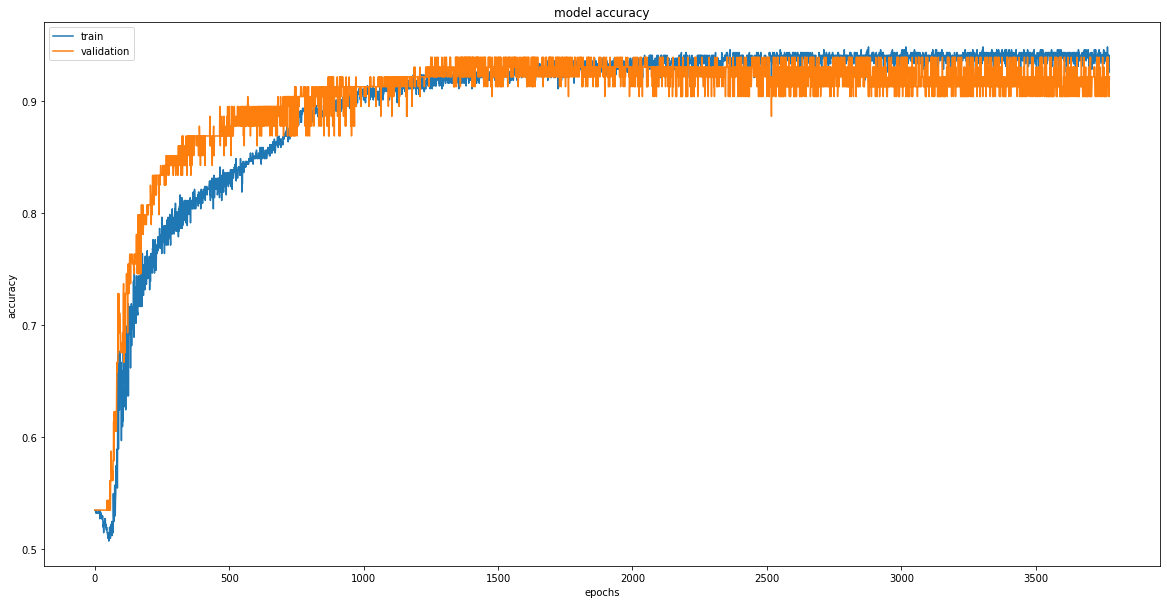

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(mdl.history['accuracy'])
plt.plot(mdl.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

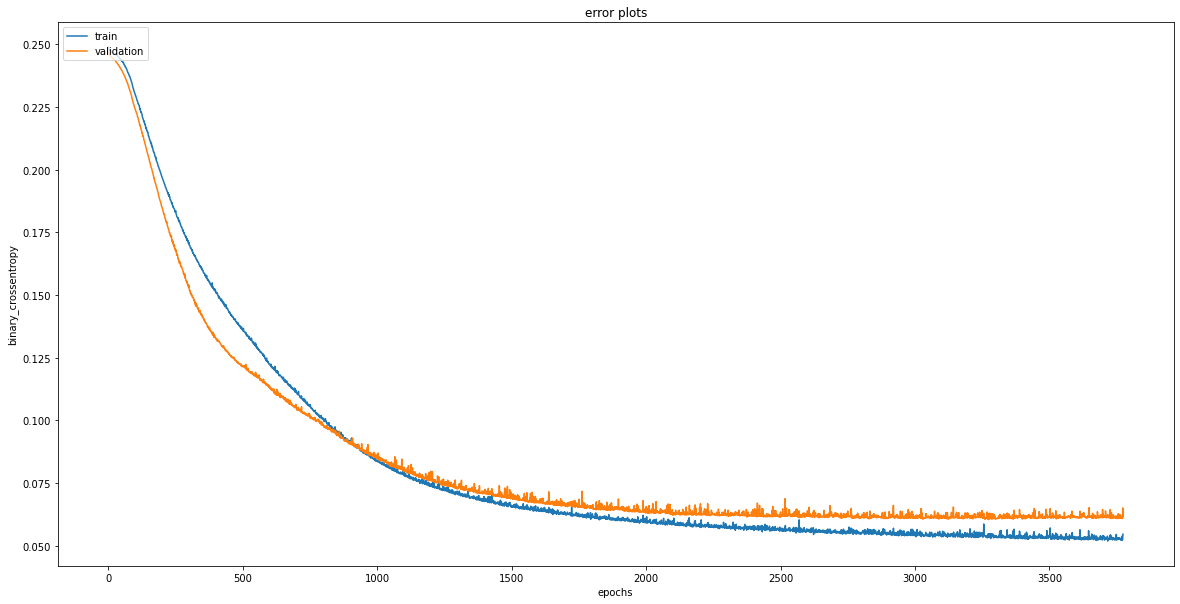

In [35]:
# summarize history for loss
plt.figure(figsize=(20,10))
plt.plot(mdl.history['loss'])
plt.plot(mdl.history['val_loss'])
plt.title('error plots')
plt.ylabel('binary_crossentropy')
plt.xlabel('epochs')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [28]:
from tensorflow.keras.models import load_model
best_model = load_model('best_model.h5')

In [29]:
y_pred = best_model.predict_classes(X_test)
y_pred = y_pred[:, 0]

c:\users\lokesh\appdata\local\programs\python\python39\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [37]:
# y_test

In [30]:
from sklearn.metrics import confusion_matrix
tp, fp, fn, tn = confusion_matrix(y_test, y_pred).ravel()
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

[[35  1]
 [ 3 19]]


In [31]:
loss, accuracy = best_model.evaluate(X_test, y_test)
print()
print('The number of samples correctly classified:')
print('Overall classification accuracy: %.2f' % (accuracy*100))

2/2 [==============================] - 0s 5ms/step - loss: 0.0587 - accuracy: 0.9310

The number of samples correctly classified:
Overall classification accuracy: 93.10


In [32]:
print('The number of samples misclassified:')
error_rate = (fp+fn)/(tp+fp+fn+tn)
print('Error rate: %.2f' % (error_rate*100))

The number of samples misclassified:
Error rate: 6.90


In [33]:
sensitivity = tp/(tp+fn)
print('Sensitivity: %.2f' % (sensitivity*100))

Sensitivity: 92.11


In [34]:
specificity = tn / (tn+fp)
print('Specificty: %.2f' % (specificity*100))

Specificty: 95.00
